<a href="https://colab.research.google.com/github/italomarcelogit/scripts-diversos/blob/master/COLAB/NLP/NLP_SKLEARN_ML_DETECTOR_DE_FAKE_NEWS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Detectando Fake News**

In [37]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
import string
import matplotlib.pyplot as plt


# Importando dados

In [46]:
dftreino = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/fakenews/train.csv')

In [47]:
dftreino.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [48]:
dftreino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [49]:
print(dftreino.shape)
dftreino.drop_duplicates(inplace=True)
dftreino.shape

(20800, 5)


(20800, 5)

In [50]:
dftreino.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [51]:
dftreino.dropna(axis=0, inplace=True)
dftreino.shape

(18285, 5)

In [52]:
dfteste = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/fakenews/test.csv')
print(dfteste.shape)
dfteste.drop_duplicates(inplace=True)
dfteste.shape

(5200, 4)


(5200, 4)

In [53]:
dfteste.isnull().sum()

id          0
title     122
author    503
text        7
dtype: int64

In [54]:
dfteste.dropna(axis=0, inplace=True)
dfteste.shape

(4575, 4)

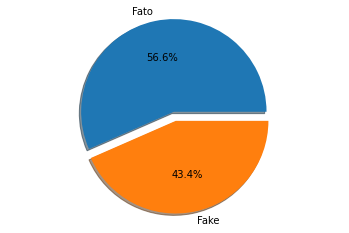

In [56]:
ffnews = dftreino[['id', 'label']].groupby('label').sum().values
ffnews = np.array(ffnews).flatten()
status = ["Fato", "Fake"]
explode = (0, 0.1)
fig, ax = plt.subplots()
ax.pie(ffnews, explode=explode, labels=status, shadow=True, autopct='%1.1f%%')
ax.axis('equal')
plt.show()

# Combinando colunas

In [57]:
dftreino.columns

Index(['id', 'title', 'author', 'text', 'label'], dtype='object')

In [58]:
dftreino['combined'] = dftreino['author'] + ' ' + dftreino['title']
dftreino.head()

,id,title,author,text,label,combined
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell Lucus House Dem Aide: We Didn’t Even S...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.com Why the Truth Might Get You...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Jessica Purkiss 15 Civilians Killed In Single ...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Howard Portnoy Iranian woman jailed for fictio...


In [59]:
dfteste['combined'] = dfteste['author'] + ' ' + dfteste['title']

# NLP

In [60]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [83]:
def processarTexto(texto):
  sem_pontuacao = [char for char in texto if char not in string.punctuation]
  sem_pontuacao = ''.join(sem_pontuacao)
  palavras = [palavra.lower() for palavra in sem_pontuacao.split() if palavra.lower() not in stopwords.words('english')]
  return palavras

In [84]:
dftreino['combined'].head().apply(processarTexto)

0    [darrell, lucus, house, dem, aide, didn’t, eve...
1    [daniel, j, flynn, flynn, hillary, clinton, bi...
2        [consortiumnewscom, truth, might, get, fired]
3    [jessica, purkiss, 15, civilians, killed, sing...
4    [howard, portnoy, iranian, woman, jailed, fict...
Name: combined, dtype: object

In [63]:
from sklearn.feature_extraction.text import CountVectorizer
# treino
# extrator_mensagem_treino = CountVectorizer(analyzer=processarTexto).fit_transform(dftreino['combined'])
# teste
# extrator_mensagem_teste = CountVectorizer(analyzer=processarTexto).fit_transform(dfteste['combined'])

In [85]:
bag_meuTFidf = CountVectorizer(analyzer=processarTexto).fit_transform(pd.concat([dftreino['combined'], dfteste['combined']]))

In [86]:
bag_meuTFidf.shape

(22860, 32772)

# Treinando modelo

In [87]:
from sklearn.naive_bayes import MultinomialNB
modelo = MultinomialNB()

Xtreino = bag_meuTFidf[:18285] # qtd de regs no dftreino antes da combinação na bag
ytreino = dftreino['label']
modelo.fit(Xtreino, ytreino)

MultinomialNB()

In [88]:
Xtreino.shape

(18285, 32772)

In [89]:
predTreino = modelo.predict(Xtreino)
predTreino

array([1, 0, 1, ..., 0, 1, 1])

In [90]:
ytreino.values

array([1, 0, 1, ..., 0, 1, 1])

In [91]:
from sklearn.metrics import classification_report
print(classification_report(ytreino, predTreino))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     10361
           1       1.00      0.98      0.99      7924

    accuracy                           0.99     18285
   macro avg       0.99      0.99      0.99     18285
weighted avg       0.99      0.99      0.99     18285



In [92]:
Xteste = bag_meuTFidf[18285:] # qtd de regs no dfteste antes da combinação na bag
predTeste = modelo.predict(Xteste)
predTeste[:10]

array([0, 1, 0, 1, 0, 1, 1, 1, 1, 1])

In [93]:
dfteste['label_previsto'] = predTeste
dfteste.head()

,id,title,author,text,combined,label_previsto
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning...",David Streitfeld Specter of Trump Loosens Tong...,0
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...,Common Dreams #NoDAPL: Native American Leaders...,1
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different...",Daniel Victor Tim Tebow Will Attempt Another C...,0
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...,Truth Broadcast Network Keiser Report: Meme Wa...,1
6,20806,Pelosi Calls for FBI Investigation to Find Out...,Pam Key,"Sunday on NBC’s “Meet the Press,” House Minori...",Pam Key Pelosi Calls for FBI Investigation to ...,0


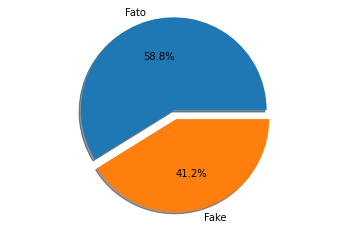

In [94]:
ffnews = dfteste[['id', 'label_previsto']].groupby('label_previsto').sum().values
ffnews = np.array(ffnews).flatten()
fig, ax = plt.subplots()
ax.pie(ffnews, explode=explode, labels=status, shadow=True, autopct='%1.1f%%')
ax.axis('equal')
plt.show()

In [95]:

for x in dfteste.sample().index.tolist():
  try:
    print(f"===> Status: {status[predTeste[x]]}")
    print(dfteste.loc[x]['title'])
    print(dfteste.loc[x]['text'], end='\n\n')
  except:
    pass

===> Status: Fato
CHRISTIANS IN SYRIA LESS THAN 500,000
Home › WORLD NEWS › CHRISTIANS IN SYRIA LESS THAN 500,000 CHRISTIANS IN SYRIA LESS THAN 500,000 0 SHARES 
[10/31/16] As the Islamic State, insurgents, and government forces battle in Syria, the population of Christians there continues to decline, from 1,250,000 in 2011 to less than 500,000 this year, according to ADF International , which advocates for religious freedom worldwide. 
In a sub-report submitted with the report Genocide Against Christians in the Middle East to Secretary of State John Kerry in March, the ADF International details the ongoing genocide of Christians and other religious minorities in the Middle East. 
It notes that “Christians are the most persecuted religious group in the world” and that in at least 104 countries Christians are harassed and persecuted by governments and organizations. 
The harassment includes “physical assaults, arrests and detentions, the desecration of holy sites and discrimination agai

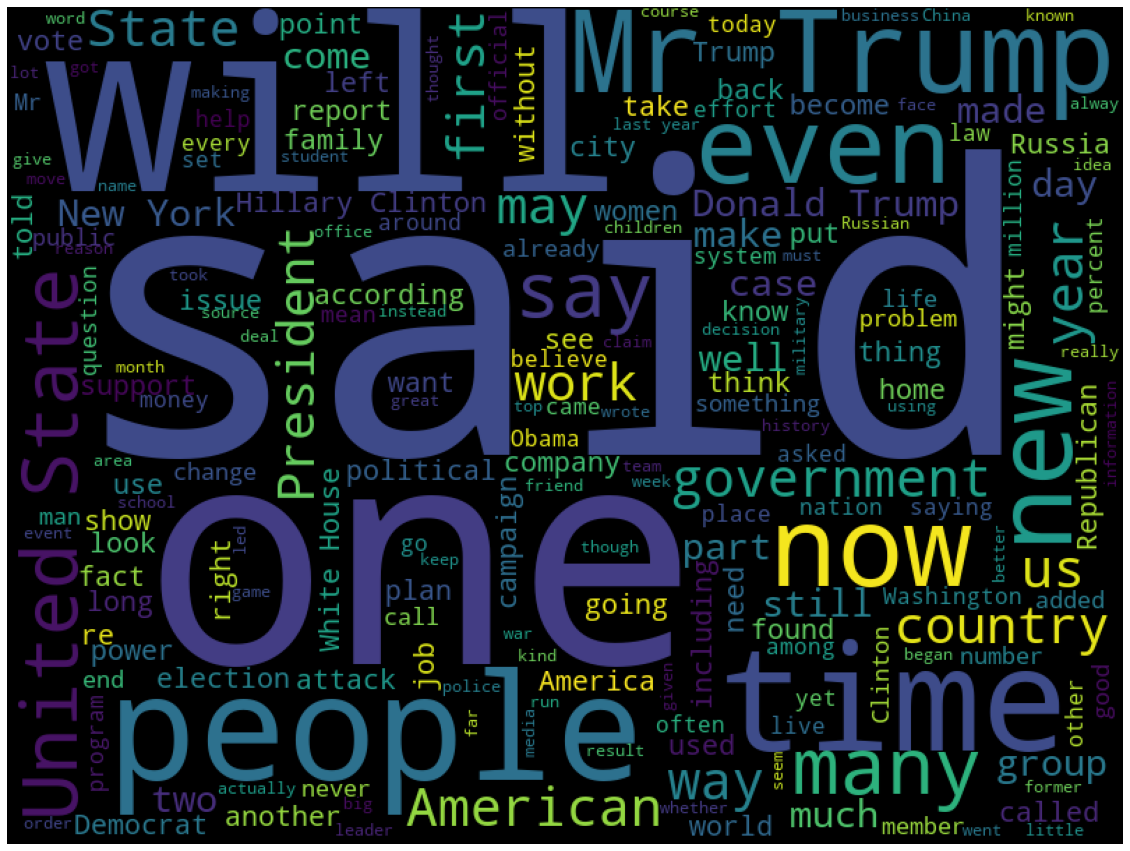

In [96]:
from wordcloud import WordCloud, STOPWORDS
wordcloud = WordCloud( background_color='black', width=800, height=600)
nuvem = wordcloud.generate(' '.join(dfteste['text']))
plt.figure(figsize=(20,30))
plt.imshow(nuvem)
plt.axis('off')
plt.show()

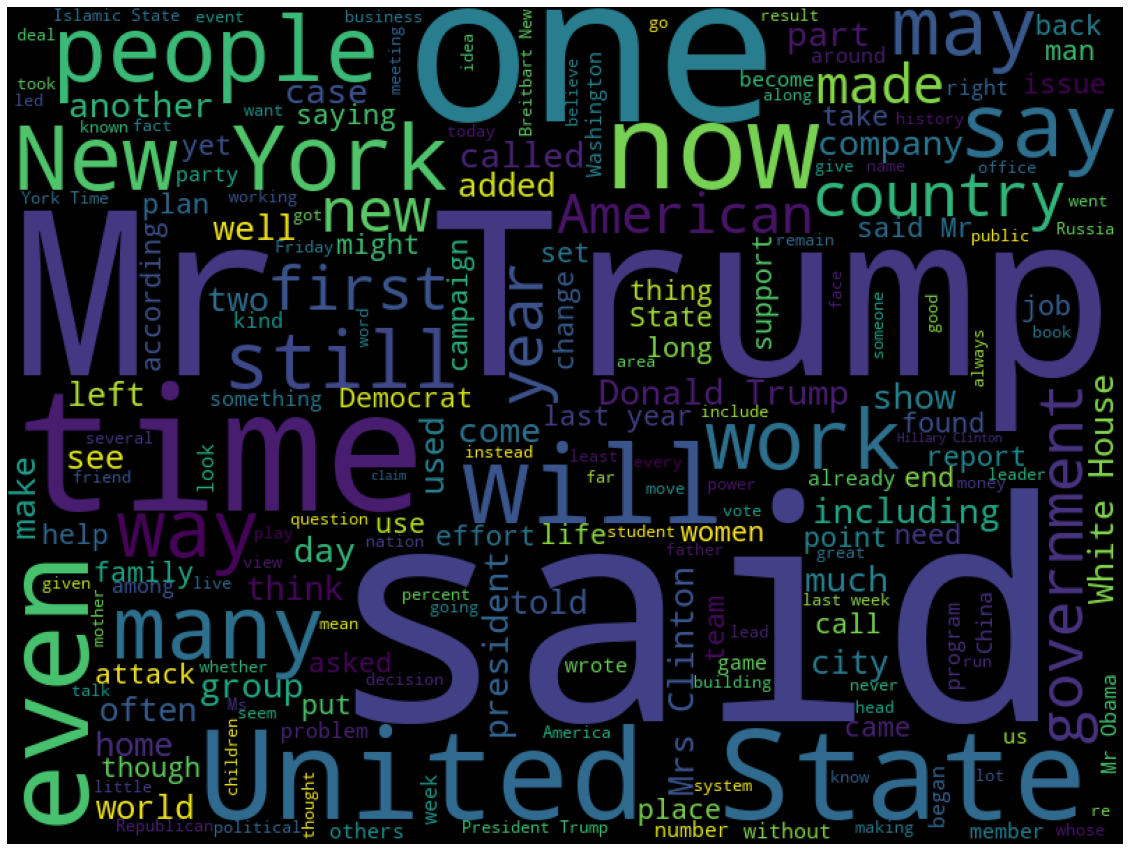

In [97]:
nuvem = wordcloud.generate(' '.join(dftreino[dftreino.label==0]['text']))
plt.figure(figsize=(20,30))
plt.imshow(nuvem)
plt.axis('off')
plt.show()

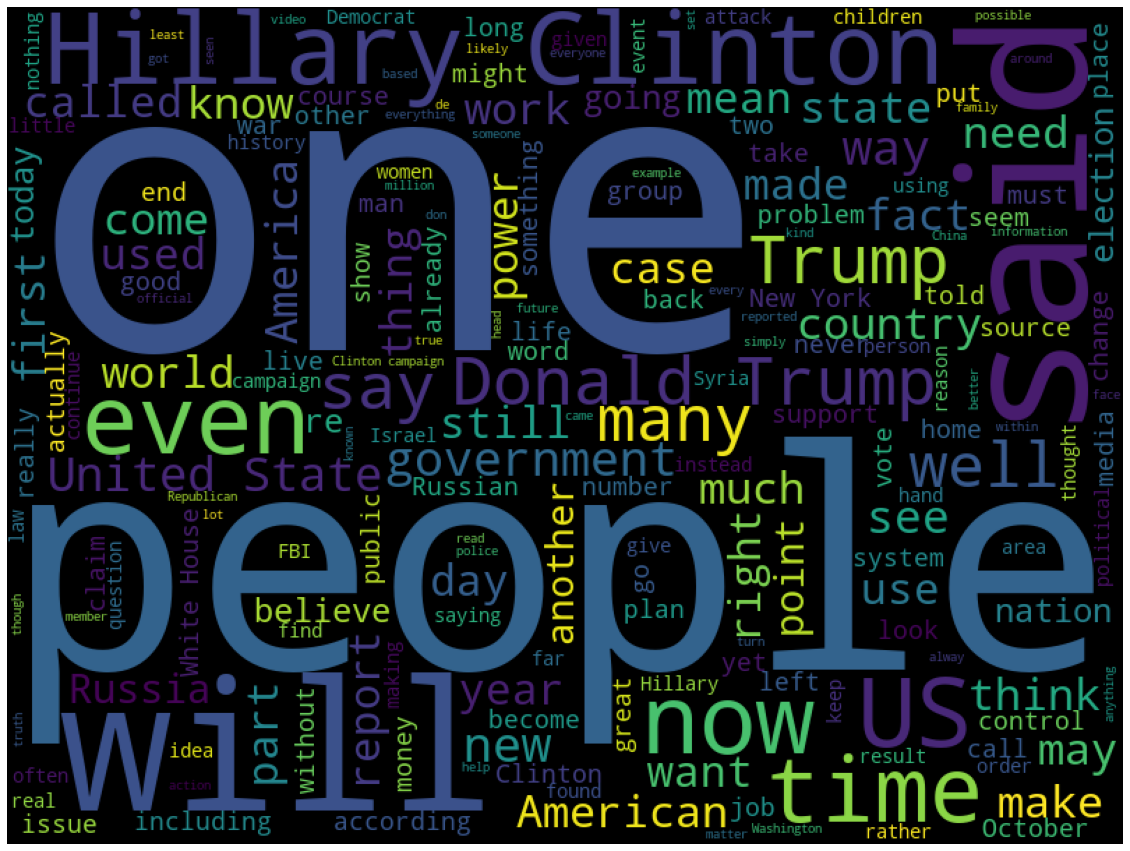

In [98]:
nuvem = wordcloud.generate(' '.join(dftreino[dftreino.label==1]['text']))
plt.figure(figsize=(20,30))
plt.imshow(nuvem)
plt.axis('off')
plt.show()